In [30]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('android-games.csv')
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [32]:
df.shape

(1730, 15)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [34]:
df.dtypes

rank                  int64
title                object
total ratings         int64
installs             object
average rating        int64
growth (30 days)    float64
growth (60 days)    float64
price               float64
category             object
5 star ratings        int64
4 star ratings        int64
3 star ratings        int64
2 star ratings        int64
1 star ratings        int64
paid                   bool
dtype: object

In [35]:
df['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

In [36]:
df['average rating'].unique()

array([4, 3, 2])

In [37]:
def convert(value):
    value = str(value).strip()  
    if 'M' in value or 'm' in value:
        return float(value.replace('M', '').replace('m', '').strip()) * 1_000_000
    elif 'K' in value or 'k' in value:
        return float(value.replace('K', '').replace('k', '').strip()) * 1_000
    else:
        return float(value)


In [38]:
df['installs']=df['installs'].apply(convert)

In [39]:
df['installs'].dtype

dtype('float64')

In [40]:
df.drop(columns=['5 star ratings','4 star ratings','3 star ratings','2 star ratings','1 star ratings'],axis=1,inplace=True)

In [41]:
df.describe()

,rank,total ratings,installs,average rating,growth (30 days),growth (60 days),price
count,1730.000000,1.730000e+03,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000
mean,50.386705,1.064332e+06,2.917618e+07,3.908092,321.735896,122.554971,0.010942
std,28.936742,3.429250e+06,6.028733e+07,0.290973,6018.914507,2253.891703,0.214987
min,1.000000,3.299300e+04,1.000000e+05,2.000000,0.000000,0.000000,0.000000
25%,25.000000,1.759992e+05,5.000000e+06,4.000000,0.100000,0.200000,0.000000
50%,50.000000,4.286065e+05,1.000000e+07,4.000000,0.500000,1.000000,0.000000
75%,75.000000,8.837970e+05,5.000000e+07,4.000000,1.700000,3.300000,0.000000
max,100.000000,8.627313e+07,1.000000e+09,4.000000,227105.700000,69441.400000,7.490000


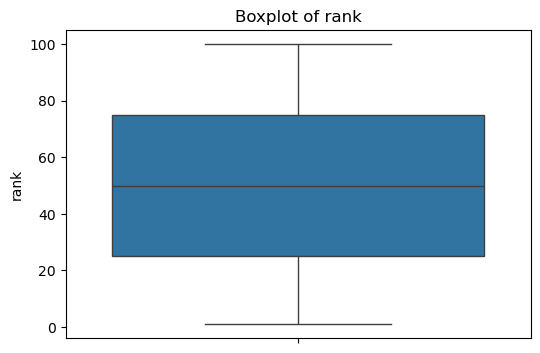

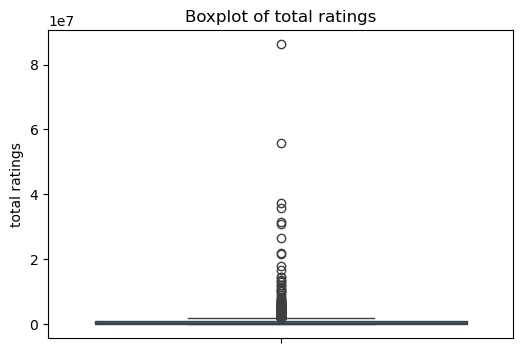

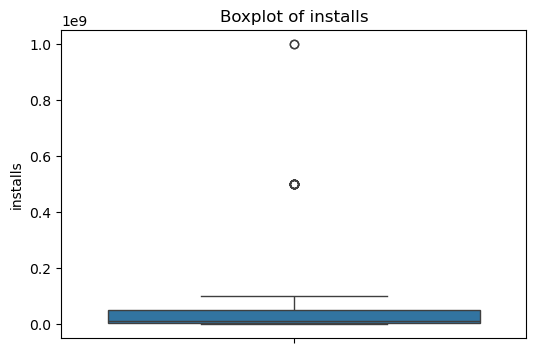

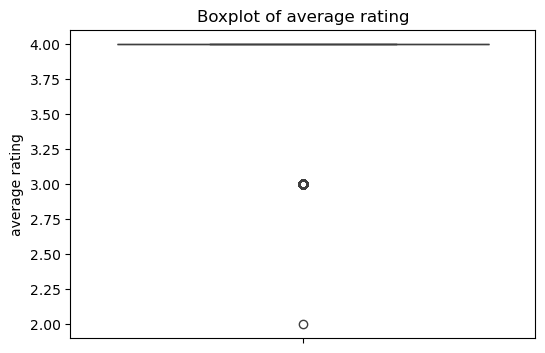

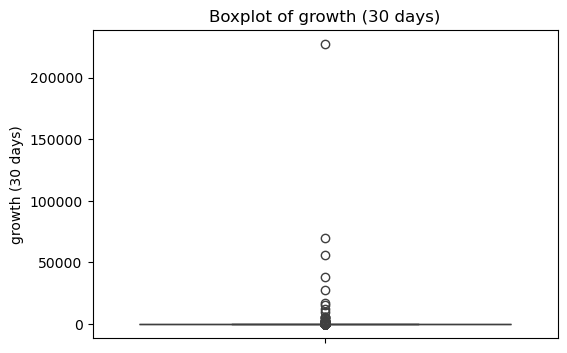

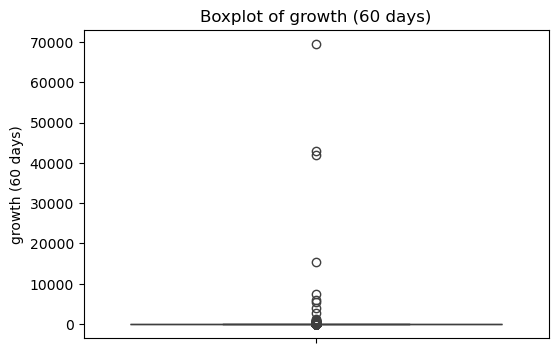

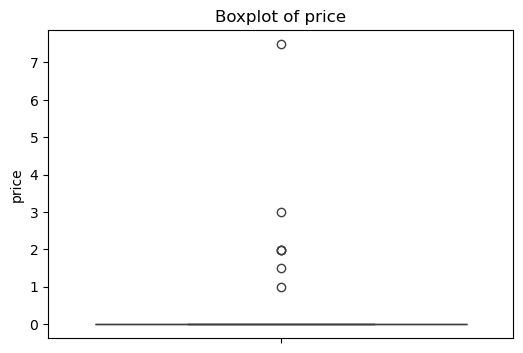

In [42]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [43]:
q1=np.percentile(df['installs'],25,method='midpoint')
q3=np.percentile(df['installs'],75,method='midpoint')
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

-62500000.0
117500000.0


In [44]:
out=[]
for x in df['installs']:
    if (x<lower or x>upper):
        out.append(x)
print(out)

[500000000.0, 500000000.0, 500000000.0, 500000000.0, 1000000000.0, 500000000.0, 500000000.0, 1000000000.0, 500000000.0, 500000000.0, 500000000.0, 500000000.0, 500000000.0, 500000000.0]


In [45]:
ind=df[df['installs'].isin(out)].index

In [46]:
df.drop(ind,inplace=True,axis=0)

In [47]:
out=[]
for x in df['installs']:
    if (x<lower or x>upper):
        out.append(x)
print(out)

[]


In [48]:
q1=np.percentile(df['price'],25,method='midpoint')
q3=np.percentile(df['price'],75,method='midpoint')
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

0.0
0.0


In [49]:
out=[]
for x in df['price']:
    if (x<lower or x>upper):
        out.append(x)
print(out)

[7.49, 1.99, 2.99, 1.99, 1.49, 0.99, 1.99]


In [50]:
ind=df[df['price'].isin(out)].index
df.drop(ind,inplace=True,axis=0)

In [51]:
out=[]
for x in df['price']:
    if (x<lower or x>upper):
        out.append(x)
print(out)

[]


In [52]:
df.head(5)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,paid
2,3,Mobile Legends: Bang Bang,26663595,100000000.0,4,1.5,3.2,0.0,GAME ACTION,False
3,4,Brawl Stars,17971552,100000000.0,4,1.4,4.4,0.0,GAME ACTION,False
5,6,Call of Duty®: Mobile - Season 4: Spurned & Bu...,13572148,100000000.0,4,2.0,4.0,0.0,GAME ACTION,False
6,7,Among Us,11936964,100000000.0,3,1.8,5.6,0.0,GAME ACTION,False
8,9,PUBG MOBILE LITE,7578630,100000000.0,4,1.0,2.5,0.0,GAME ACTION,False


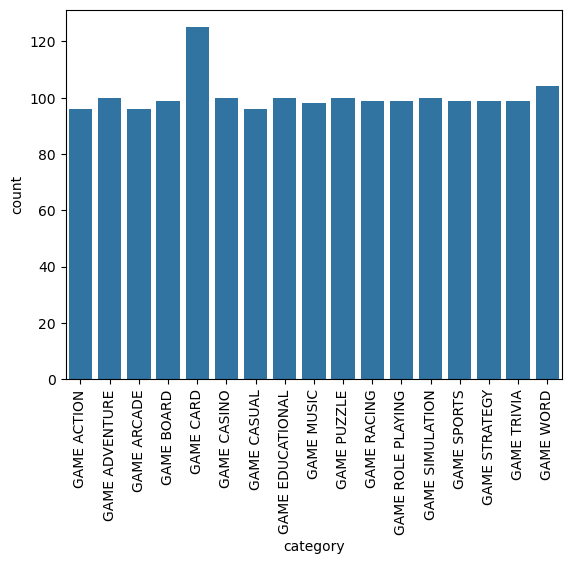

In [53]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show()

In [57]:
rate=df.groupby('category')['average rating'].sum().reset_index()

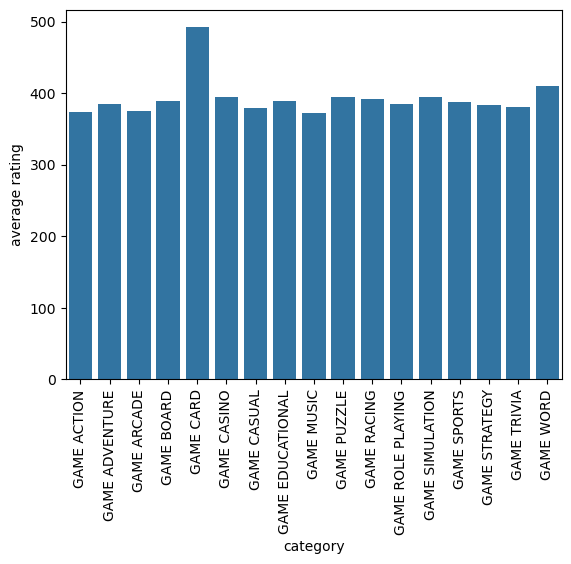

In [60]:
sns.barplot(rate,x='category',y='average rating')
plt.xticks(rotation=90)
plt.show()

In [65]:
df['title'].nunique()

1654

In [70]:
ins=df.groupby('title')['installs'].sum().reset_index()
top_10=ins.nlargest(10,'installs')
top_10

,title,installs
1238,Solitaire,980000000.0
221,Bubble Shooter,400000000.0
1509,Word Search,170000000.0
1121,Real Racing 3,110000000.0
1358,The Simpsons™: Tapped Out,110000000.0
7,2 3 4 Player Mini Games,100000000.0
11,3D Bowling,100000000.0
40,Agar.io,100000000.0
49,Among Us,100000000.0
50,Anger of stick 5 : zombie,100000000.0


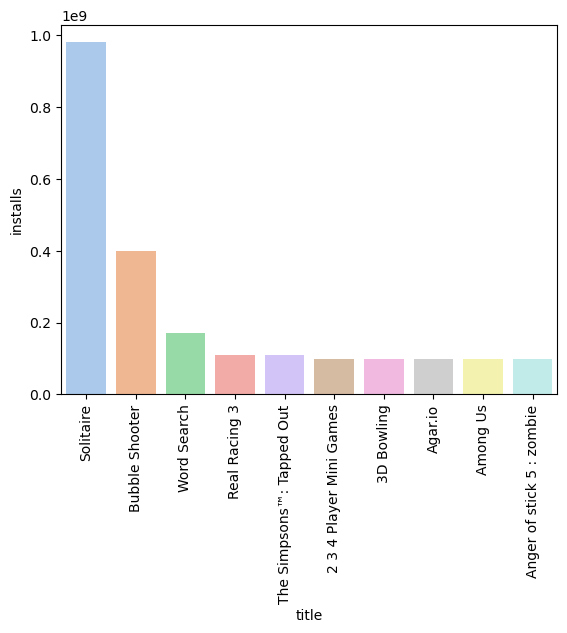

In [76]:
sns.barplot(top_10,x='title',y='installs',palette='pastel',hue='title')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='paid', ylabel='count'>

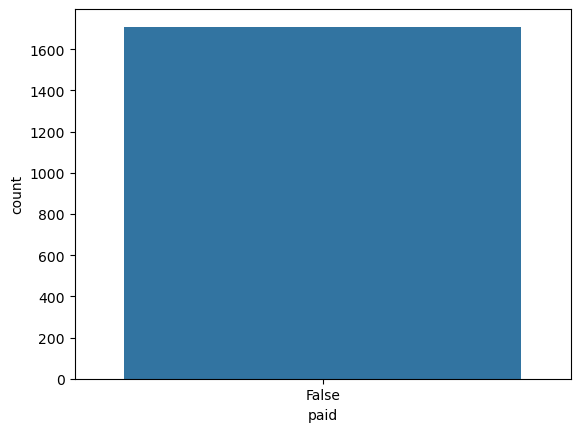

In [83]:
sns.countplot(x='paid', data=df)
